# 15x15 Arrays

This is an collection of 2d numpy array each of the shape 15,15, filled with various values, e.g. Gauss, Uniform, Checkboard...

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def disp(x, sep='.0f'): 
    plt.figure(figsize = (16,9))
    sns.heatmap(x,annot=True,fmt=sep, cmap="YlGnBu"); # Change range with: vmin=0, vmax=1

# Arrays form list comprehension

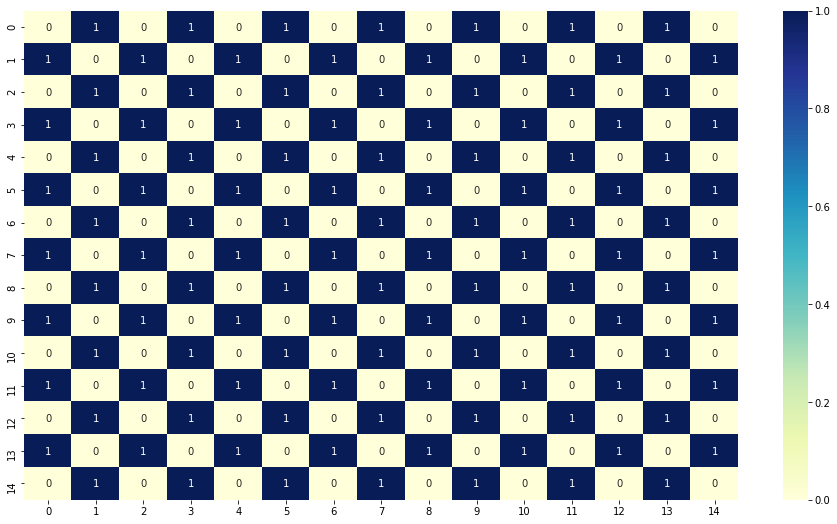

In [2]:
#Checkboard
pixX,pixY=(15,15)
x= [[(i+j)%2 for i in range(pixX)] for j in range(pixY)]
x= np.array(x)
disp(x)

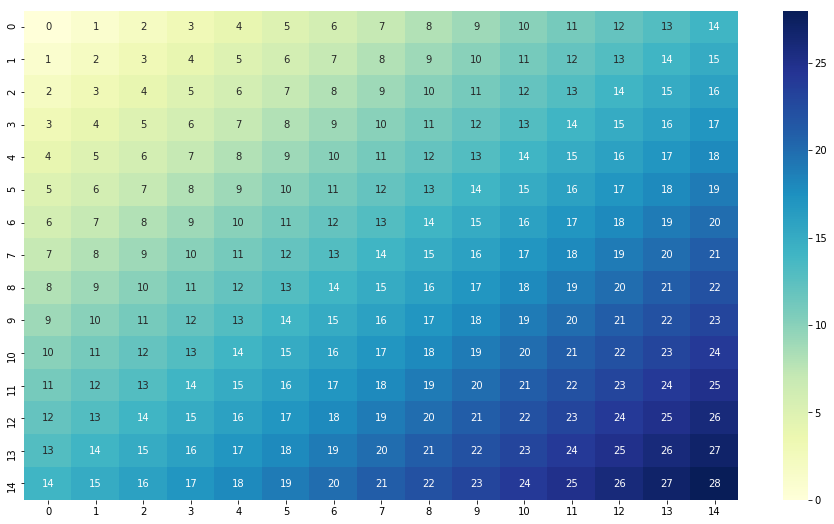

In [3]:
#Linear diagonal
x = [[i+j for i in range(pixX)] for j in range(pixY)]
## vs x=np.fromfunction(lambda i, j: i + j, (15, 15), ) #TODO
disp(x)

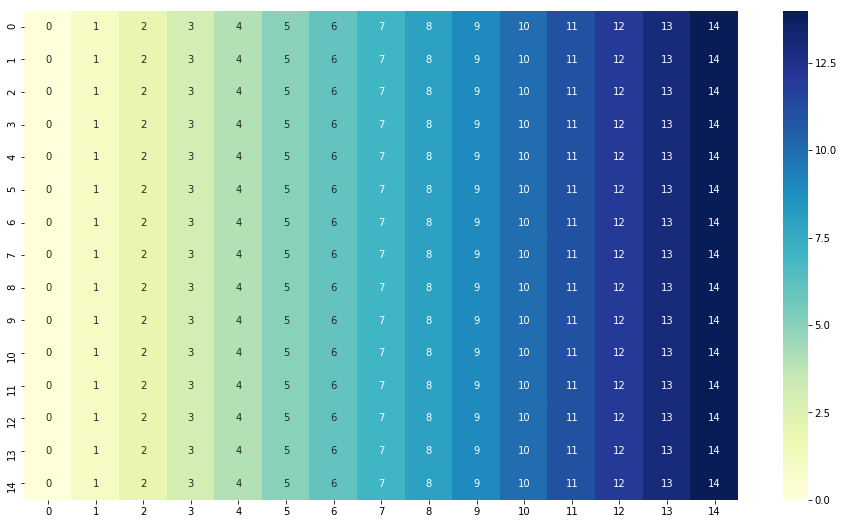

In [9]:
#Linear in axis1 direction
x = [[i for i in range(pixX)] for j in range(pixY)]
disp(x)

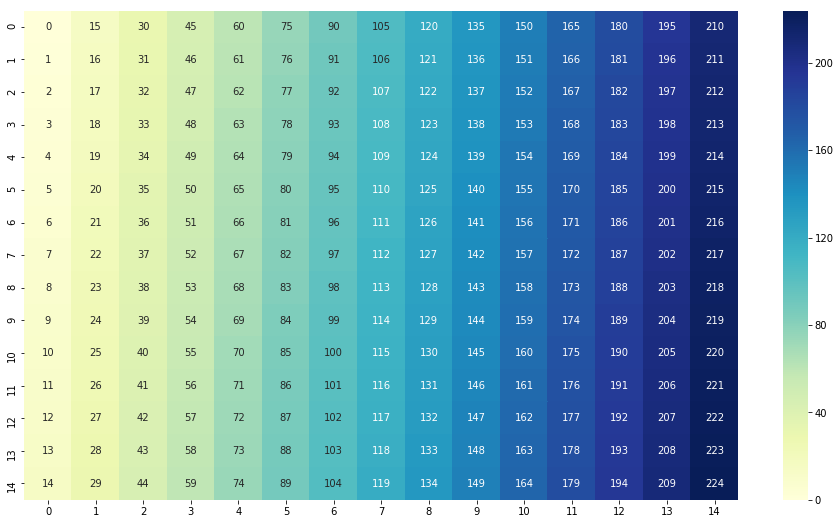

In [11]:
#Linear counter hori
x = [[i*pixY+j for i in range(pixX)] for j in range(pixY)]
disp(x)

# Arrays form numpy


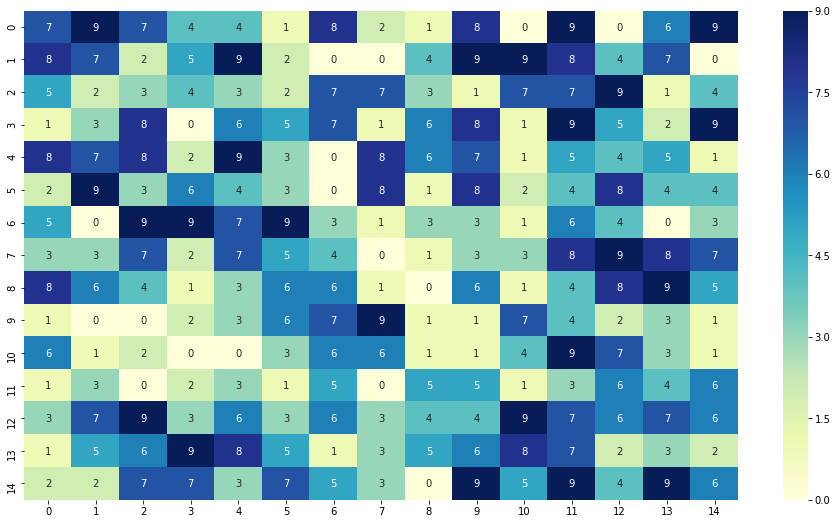

In [10]:
#Random
x = np.random.randint(0, 10, size=(15, 15))
disp(x)

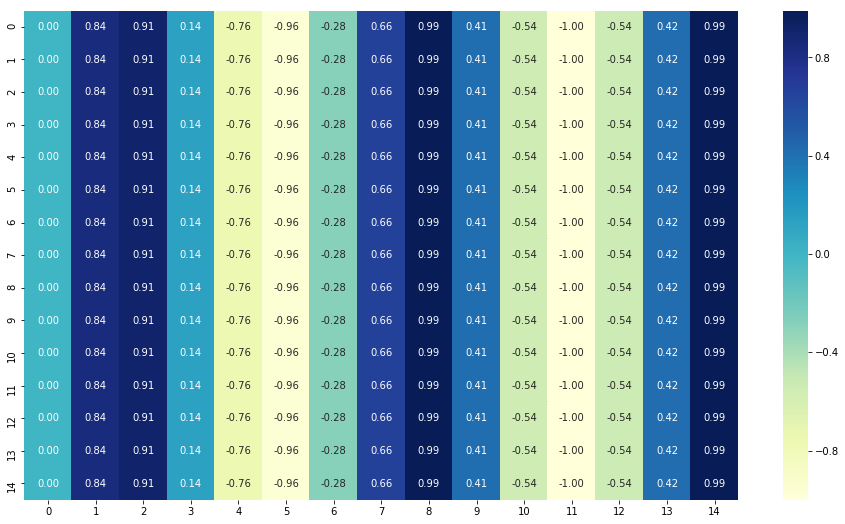

In [34]:
# sinudial fromfunction
x=np.fromfunction(lambda i, j: np.sin(j), (15, 15))
disp(x, sep= ".2f")

# Arrays form numpy meshgrid
Same idea with meshgrid (with sparse = False):
returns two arrays:   xx->  (15,15) & yy -> (15,15) [Image Source](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy)
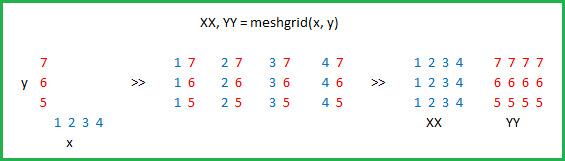
Case sparse = True 
returns two arrays:  xx->(1,15) &   yy -> (1,15)

## This is the faster method, because of vectorised functions

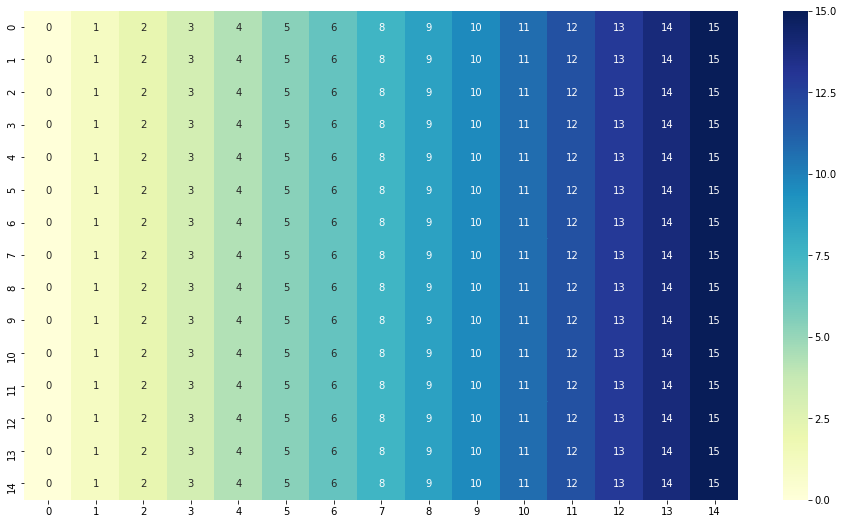

In [32]:
x = np.linspace(0, 15, 15)
y = np.linspace(0, 15, 15)
xx, yy = np.meshgrid(x, y, sparse=False)
disp(xx)

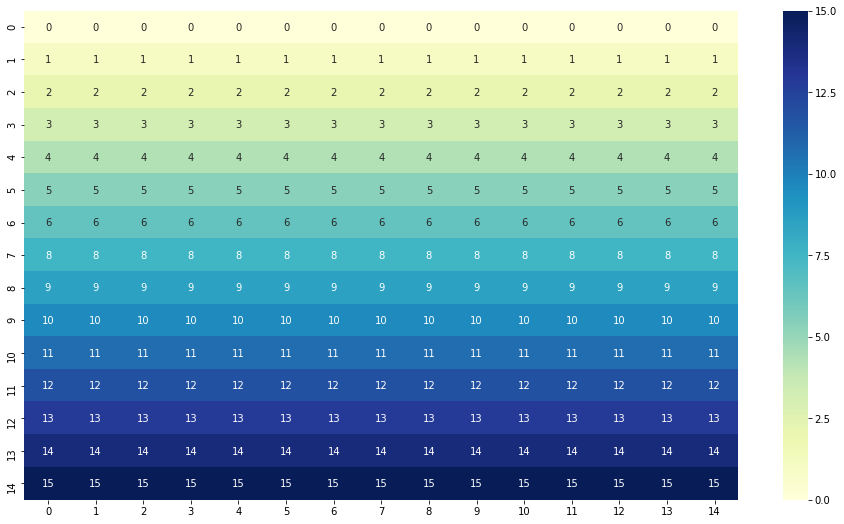

In [33]:
x = np.linspace(0, 15, 15)
y = np.linspace(0, 15, 15)
xx, yy = np.meshgrid(x, y, sparse=False)
disp(yy)

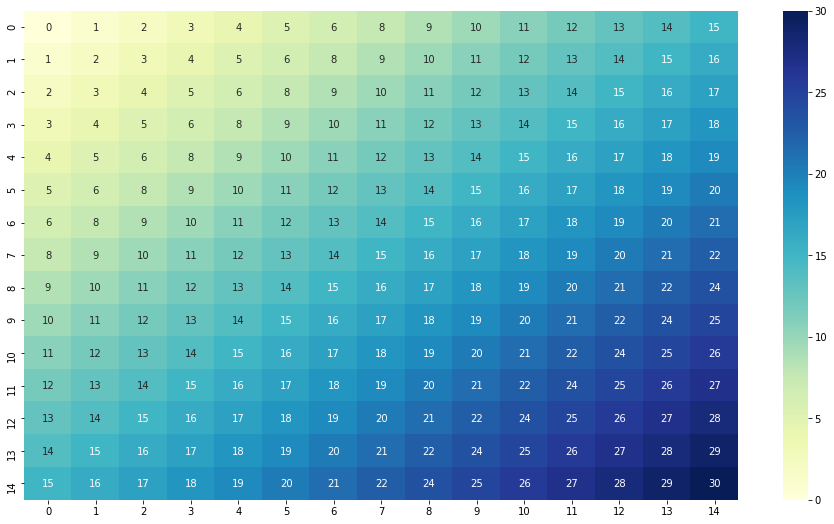

In [36]:
x = np.linspace(0, 15, 15)
y = np.linspace(0, 15, 15)
xx, yy = np.meshgrid(x,y, sparse= False)
z = xx+yy
disp(z)

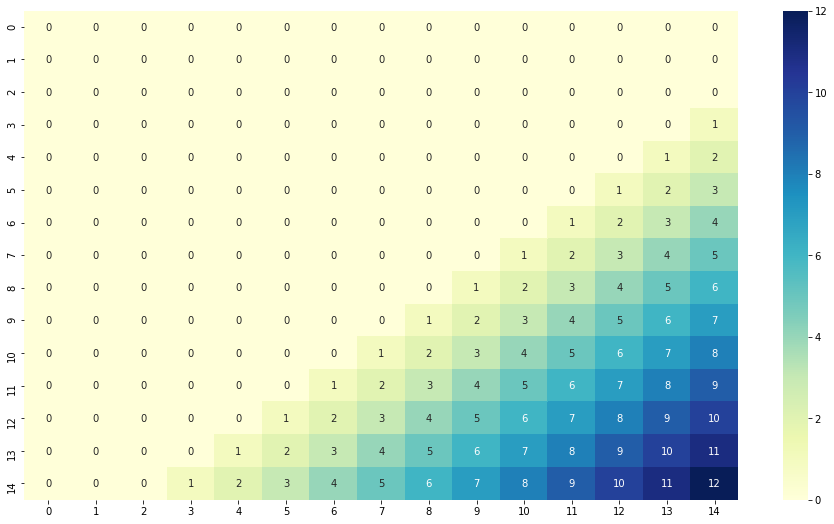

In [37]:
x= np.arange(-pixX//2,pixX//2)
y= np.arange(-pixY//2,pixY//2)
xx, yy = np.meshgrid(x,y, sparse= False)
z = xx+yy
z[ z <= 0 ] = 0
disp(z)

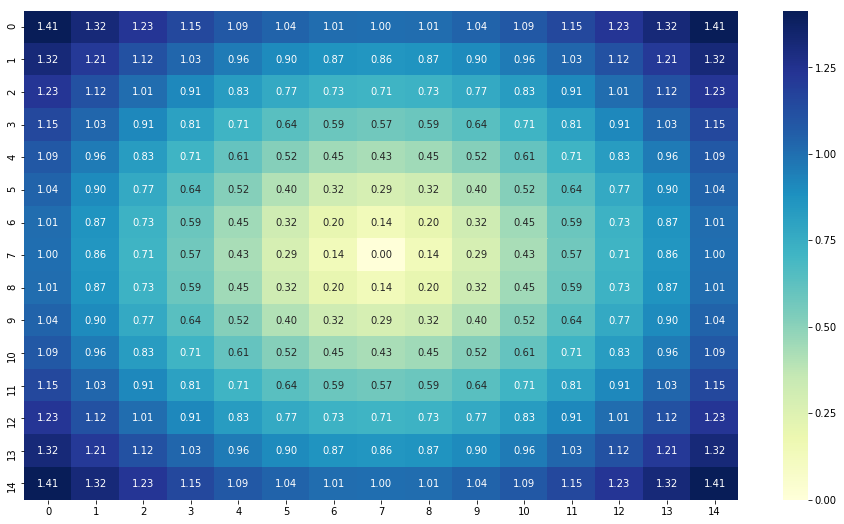

In [40]:
#Linear increase from center in all directions
pixX,pixY=(15,15)
x, y = np.meshgrid(np.linspace(-1,1,pixX), np.linspace(-1,1,pixY),sparse=False)
d = np.sqrt(x**2+y**2)
disp(d, sep='.2f' )

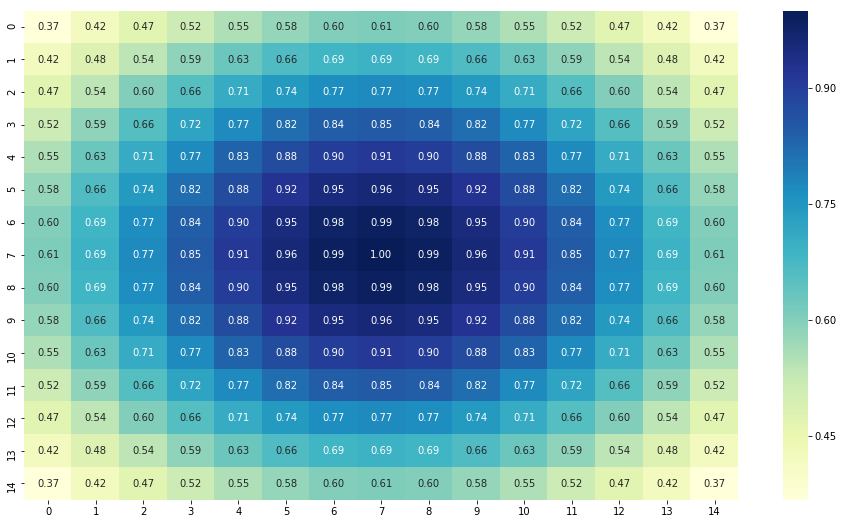

In [4]:
#Gaussian
pixX,pixY=(15,15)
x, y = np.meshgrid(np.linspace(-1,1,pixX), np.linspace(-1,1,pixY))
d = np.sqrt(x**2+y**2)
sigma, mu = 1.0, 0.0
g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
disp(g, sep='.2f' )

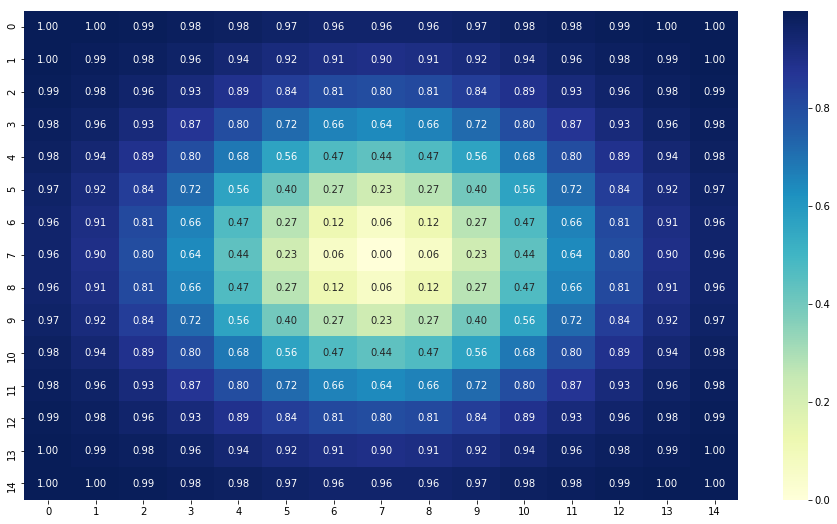

In [3]:
# One Minus Gaussian and smaller sigma
pixX,pixY=(15,15)
x, y = np.meshgrid(np.linspace(-1,1,pixX), np.linspace(-1,1,pixY))
d = np.sqrt(x**2+y**2)
sigma, mu = 0.4, 0.0
g = 1-np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
disp(g, sep='.2f' )

# Some more exotic numpy arrays:

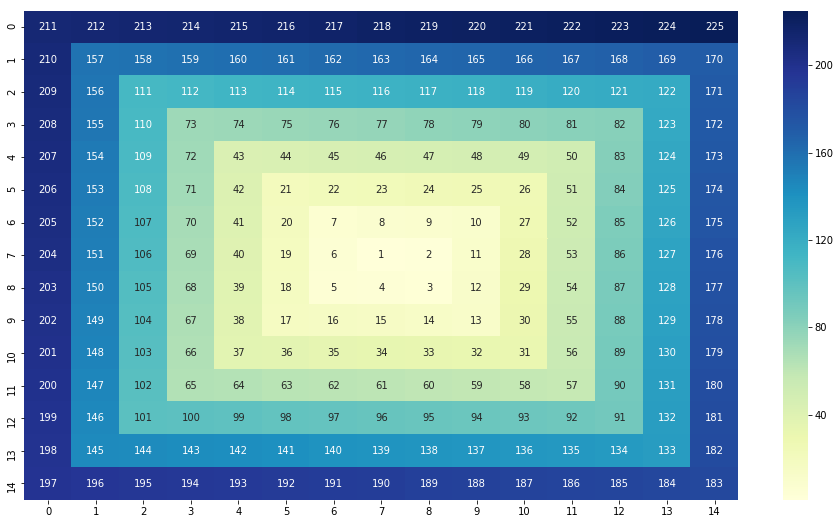

In [12]:
# spiral  # code from : https://stackoverflow.com/questions/36834505/creating-a-spiral-array-in-python
pixX,pixY=(15,15)
def spiral(width, height):
    NORTH, S, W, E = (0, -1), (0, 1), (-1, 0), (1, 0) # directions
    turn_right = {NORTH: E, E: S, S: W, W: NORTH} # old -> new direction

    if width < 1 or height < 1:
        raise ValueError
    x, y = width // 2, height // 2 # start near the center
    dx, dy = NORTH # initial direction
    matrix = [[None] * width for _ in range(height)]
    count = 0
    while True:
        count += 1
        matrix[y][x] = count # visit
        # try to turn right
        new_dx, new_dy = turn_right[dx,dy]
        new_x, new_y = x + new_dx, y + new_dy
        if (0 <= new_x <= width and 0 <= new_y <= height and
            matrix[new_y][new_x] is None): # can turn right
            x, y = new_x, new_y
            dx, dy = new_dx, new_dy
        else: # try to move straight
            x, y = x + dx, y + dy
            if not (0 <= x < width and 0 <= y < height):
                return matrix # nowhere to go
num_pixels=19
x=spiral(pixX, pixY)
disp(x)

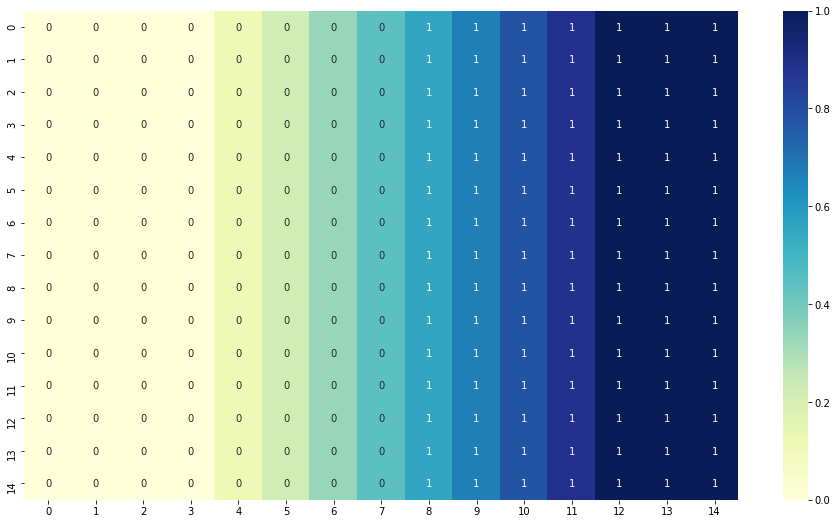

In [14]:
# linear_step fromfunction with transition
def linear_step_func(x,x0,x1):
    y= np.piecewise(x, [
        x < x0, 
       (x >= x0) & (x <= x1), 
        x > x1],
            [0.,
            lambda x: x/(x1-x0)+x0/(x0-x1), 
             1.]
       )
    return y
x=np.fromfunction(lambda i, j: linear_step_func(j,3,12), (15, 15))
disp(x)

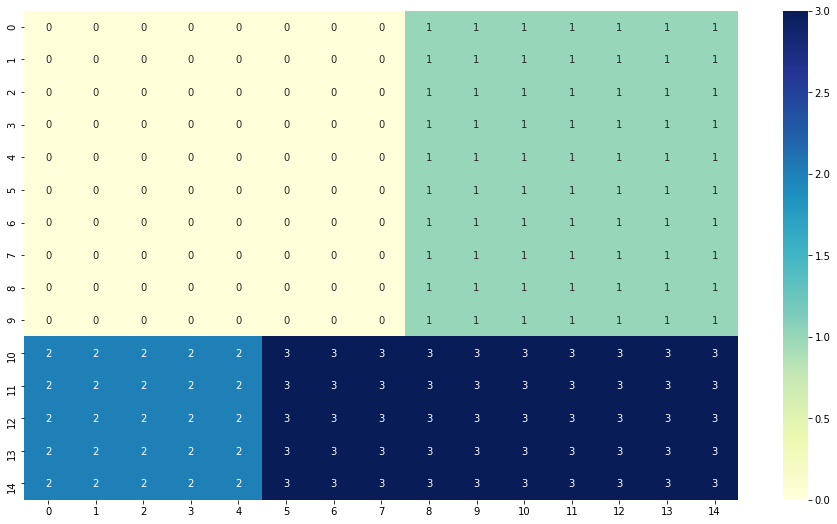

In [30]:
#from 4 regions
region0 = np.zeros( (10,8) )
region1 = np.ones( (10,7) )
region_top= np.concatenate( [region0,region1] , axis=1)

region2 = np.full( (5,5) , 2)
region3 = np.full( (5,10) ,3)
region_bottom = np.concatenate( [region2,region3] , axis=1)

x= np.concatenate( [region_top,region_bottom] ,axis=0)
disp(x)


# Overview:

## Requires
* vivid
* Extendable
* Mix from nummpy and list comprehension
* Ready for copy and paste use

## Content
* Checkboard
* Gauss
* Spiral
* Random
* Uniform random
* Linear
* Copy paste able
* Removing zeros